**Preprocessing - Titanic Dataset**

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**1. Load the dataset into python environment**

In [123]:
df=pd.read_csv('/content/titanic_dataset.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


**2. Make ‘PassengerId’ as the index column**

In [124]:
df.set_index('PassengerId',inplace=True)

In [125]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**3. Check the basic details of the dataset**

In [126]:
# checking the datatype of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [127]:
# statistical analysis
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [128]:
# count number of missing value
df.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


In [129]:
# checking shape of dataset
df.shape

(891, 11)

**4. Fill in all the missing values present in all the columns in the dataset**

In [130]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


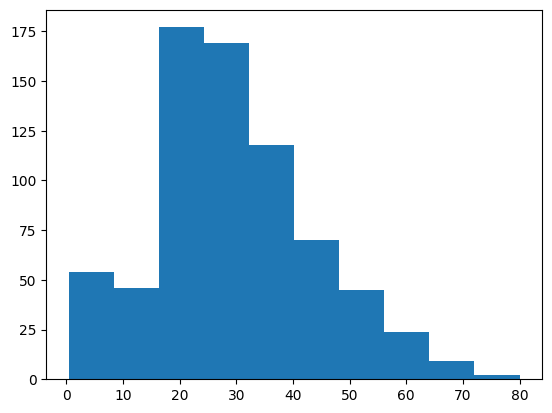

In [131]:
plt.hist(df['Age'])
plt.show()

In [132]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [133]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [134]:
df.Cabin= df.Cabin.fillna(0)

In [135]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,0


**5. Check and handle outliers in the dataset**

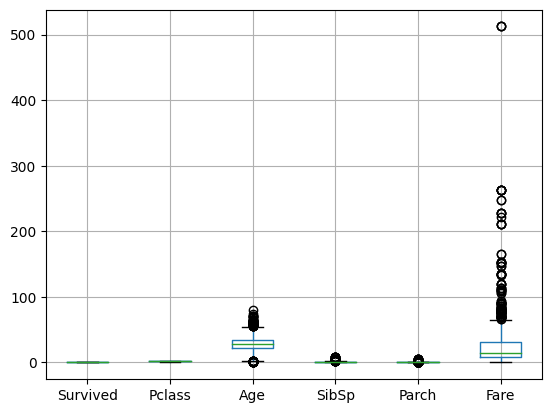

In [136]:
df.boxplot()
plt.show()

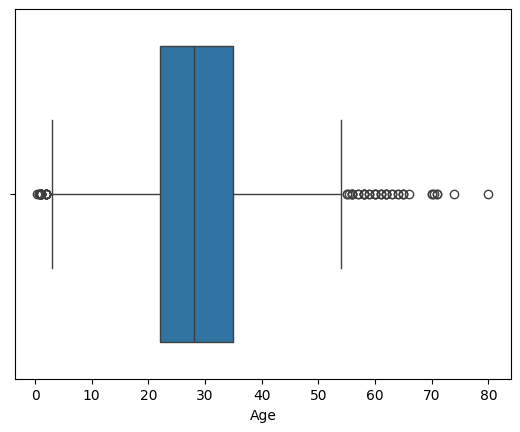

In [137]:
sns.boxplot(x='Age', data=df)
plt.show()

In [138]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)

IQR = Q3 - Q1

threshold = 1.5

upper = np.where(df['Age'] >= (Q3+1.5*IQR))

lower = np.where(df['Age'] <= (Q1-1.5*IQR))

df = df.reset_index(drop=True)

df.drop(upper[0], inplace=True)
df.drop(lower[0], inplace=True)

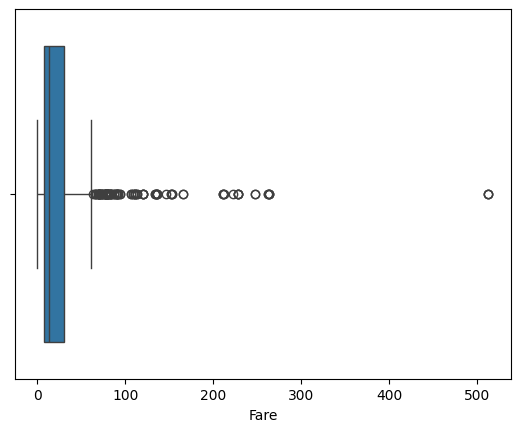

In [139]:
sns.boxplot(x='Fare', data=df)
plt.show()

In [140]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)

IQR = Q3 - Q1

threshold = 1.5

upper = np.where(df['Fare'] >= (Q3+1.5*IQR))

lower = np.where(df['Fare'] <= (Q1-1.5*IQR))

df = df.reset_index(drop=True)

df.drop(upper[0], inplace=True)
df.drop(lower[0], inplace=True)

**6. Do min max scaling on the feature set (Take ‘Survived’ as target)**

In [141]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Embarked']=le.fit_transform(df['Embarked'])

In [142]:
x=df.drop(columns=['Survived','Name','Cabin','Ticket'],axis=1)
y=df['Survived']

In [143]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit_transform(x)

array([[1.        , 1.        , 0.37254902, ..., 0.        , 0.11811819,
        1.        ],
       [1.        , 0.        , 0.45098039, ..., 0.        , 0.1291154 ,
        1.        ],
       [0.        , 0.        , 0.62745098, ..., 0.        , 0.86511391,
        1.        ],
       ...,
       [1.        , 0.        , 0.49019608, ..., 0.33333333, 0.38205125,
        1.        ],
       [0.        , 1.        , 0.45098039, ..., 0.        , 0.48876492,
        0.        ],
       [1.        , 1.        , 0.56862745, ..., 0.        , 0.12626427,
        0.5       ]])